In [ ]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import time
import random
from google.colab import files
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import matplotlib.cm as cm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from google.colab import drive

In [ ]:
#mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#naming data directory from drive
data_dir = '/content/drive/My Drive/SAC10491/'

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/SAC10491/dairy_dataset.csv') #load dataset from our drive

pd.set_option('display.max_columns', None)  # This will display all columns
df #display our dataset

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,25,Frozen,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,29293.5228,22,Tetra Pack,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,18377.0200,30,Refrigerated,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,21835.5072,72,Frozen,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,12390.5145,11,Refrigerated,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,49080.9050,5,Refrigerated,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,45294.5655,23,Refrigerated,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,54043.4916,7,Refrigerated,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,47.4300,7,Refrigerated,2022-10-02,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


In [ ]:
#to check basic information of our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

In [ ]:
df.describe() #statistical information of numerical features

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000


In [ ]:
df.describe(include='object') #statistical information of categorical features


,Location,Farm Size,Date,Product Name,Brand,Storage Condition,Production Date,Expiration Date,Customer Location,Sales Channel
count,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325
unique,15,3,1278,10,11,5,1405,1441,15,3
top,Delhi,Large,2021-01-28,Curd,Amul,Refrigerated,2022-01-13,2019-07-27,Delhi,Retail
freq,525,1462,11,479,1053,2459,9,9,499,1478


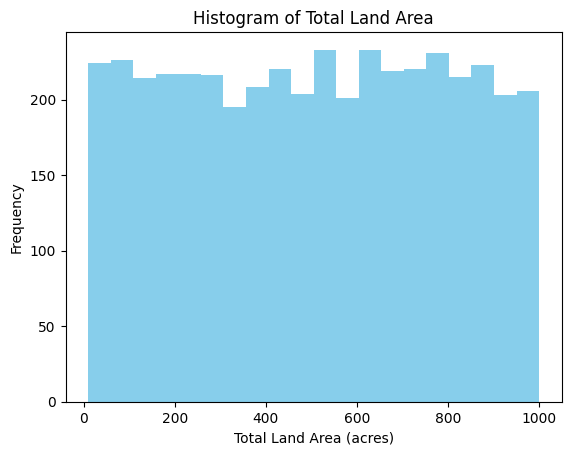

In [ ]:
import matplotlib.pyplot as plt

# Example for Total Land Area
plt.hist(df['Total Land Area (acres)'], bins=20, color='skyblue')
plt.xlabel('Total Land Area (acres)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Land Area')
plt.show()


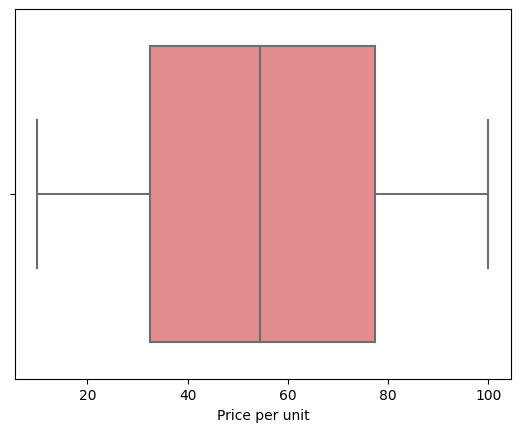

In [ ]:
import seaborn as sns

# Example for Number of Cows
sns.boxplot(x=df['Price per Unit'], color='lightcoral')
plt.xlabel('Price per unit')
plt.show()


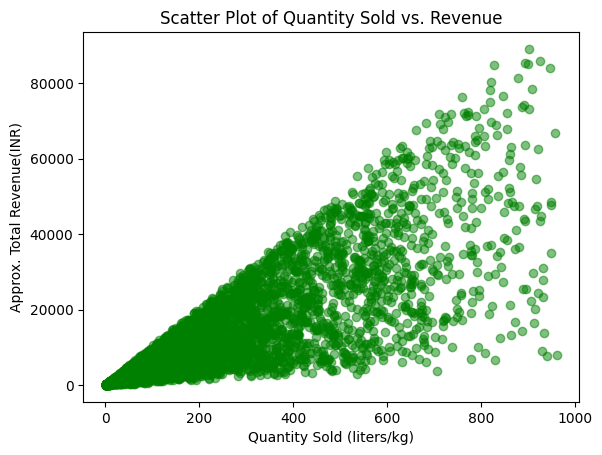

In [ ]:
# Example for Scatter Plot
plt.scatter(df['Quantity Sold (liters/kg)'], df['Approx. Total Revenue(INR)'], alpha=0.5, color='green')
plt.xlabel('Quantity Sold (liters/kg)')
plt.ylabel('Approx. Total Revenue(INR)')
plt.title('Scatter Plot of Quantity Sold vs. Revenue')
plt.show()


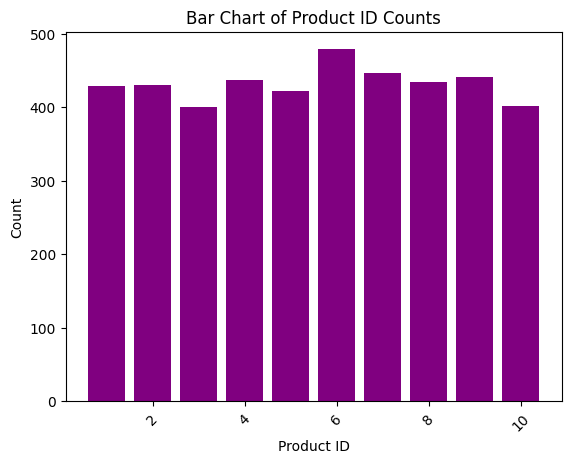

In [ ]:
# Example for Bar Chart of Product ID
product_counts = df['Product ID'].value_counts()
plt.bar(product_counts.index, product_counts.values, color='purple')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Bar Chart of Product ID Counts')
plt.xticks(rotation=45)

plt.show()


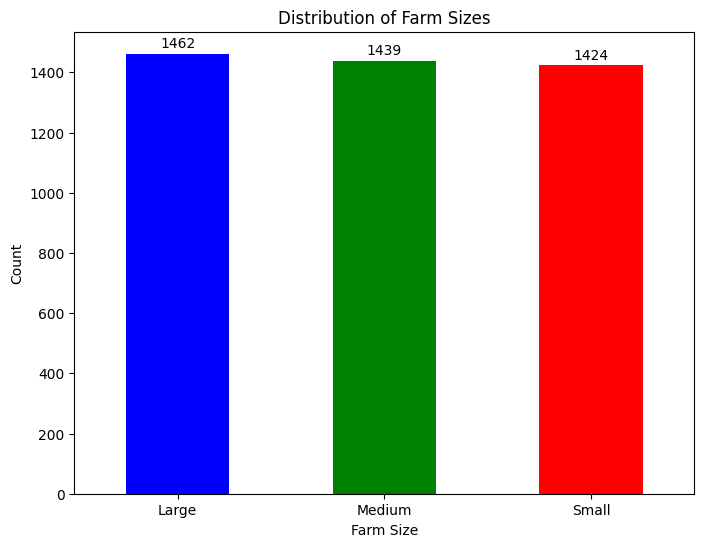

In [ ]:
# Filter and count farm sizes
farm_size_counts = df['Farm Size'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
farm_size_counts.plot(kind='bar', color=['blue', 'green', 'red'])  # Assign colors to 'Large', 'Medium', and 'Small'
plt.title('Distribution of Farm Sizes')
plt.xlabel('Farm Size')
plt.xticks(rotation=None)
plt.ylabel('Count')

# Annotate the plot with the count of each farm size
for i, count in enumerate(farm_size_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()

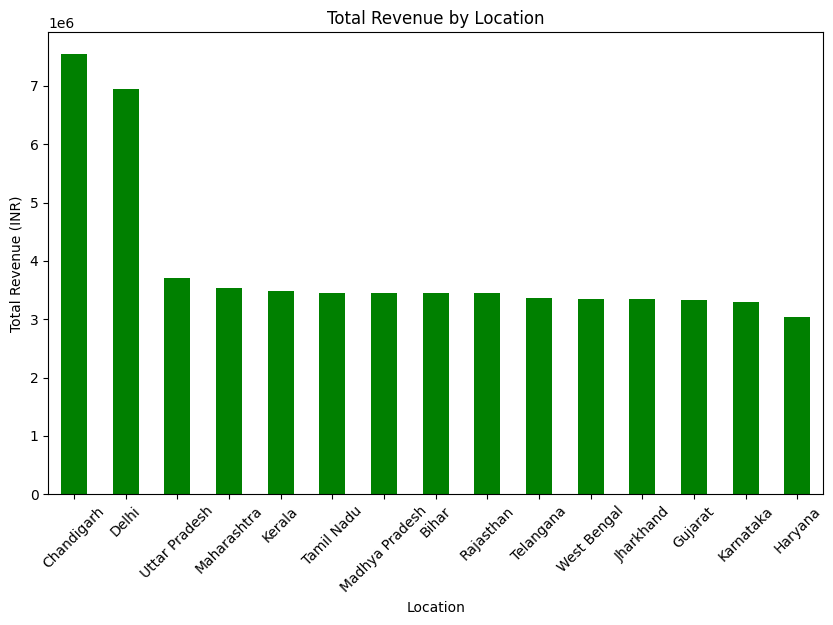

In [ ]:
# 3. Calculate and visualize the total revenue per location
total_revenue_by_location = df.groupby('Location')['Approx. Total Revenue(INR)'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
total_revenue_by_location.plot(kind='bar', color='green')
plt.title('Total Revenue by Location')
plt.xlabel('Location')
plt.ylabel('Total Revenue (INR)')
plt.xticks(rotation=45)
plt.show()

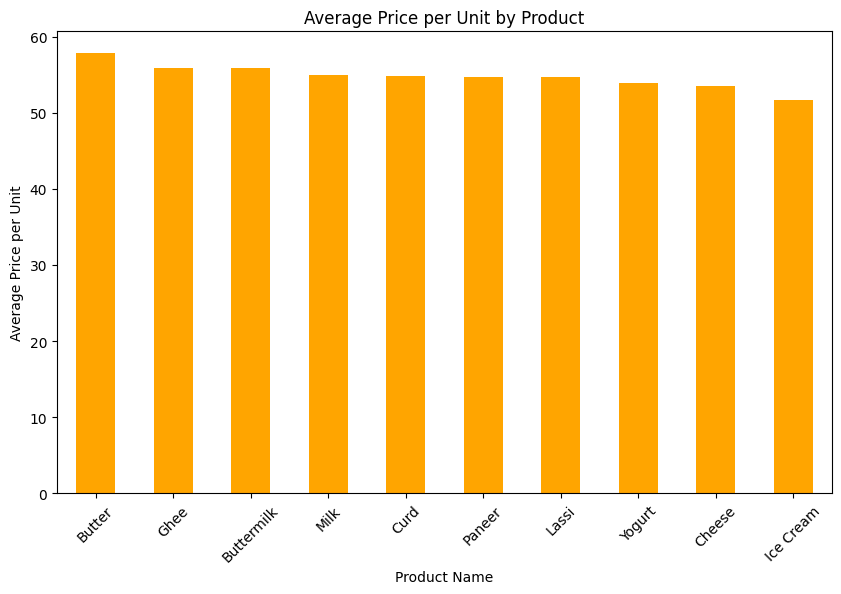

In [ ]:
# 4. Calculate and visualize the average price per unit by product name
avg_price_by_product = df.groupby('Product Name')['Price per Unit'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_price_by_product.plot(kind='bar', color='orange')
plt.title('Average Price per Unit by Product')
plt.xlabel('Product Name')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-2697a190387c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


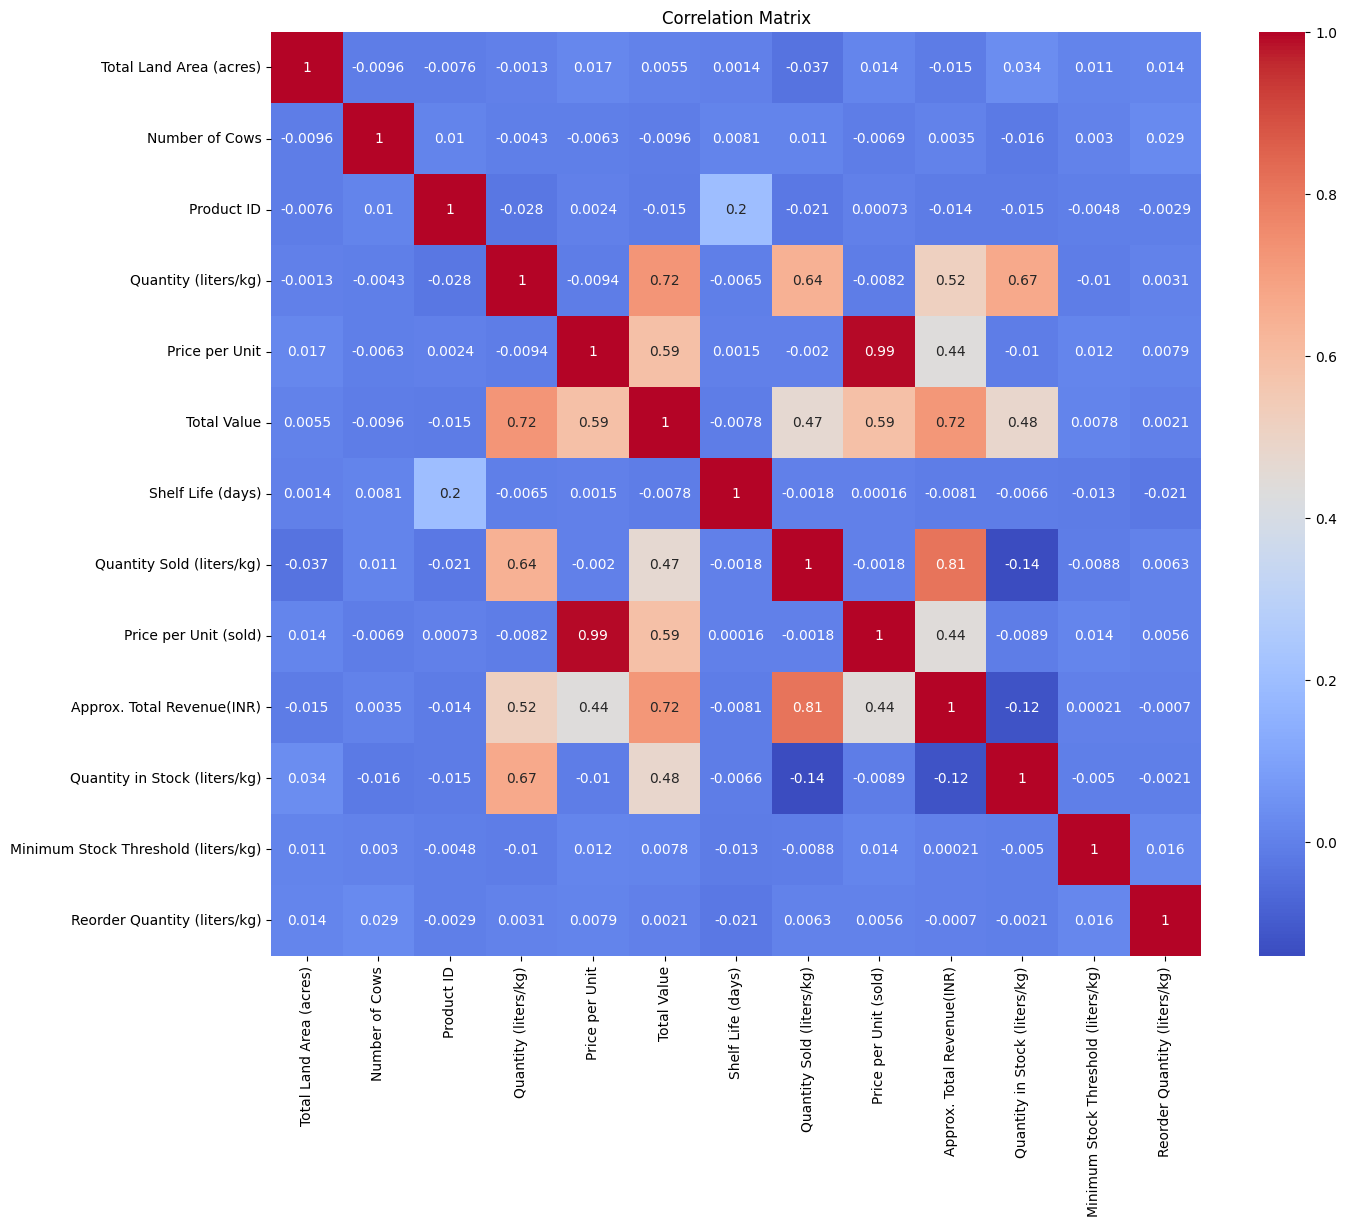

In [ ]:
# Correlation matrix
plt.figure(figsize=(15,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

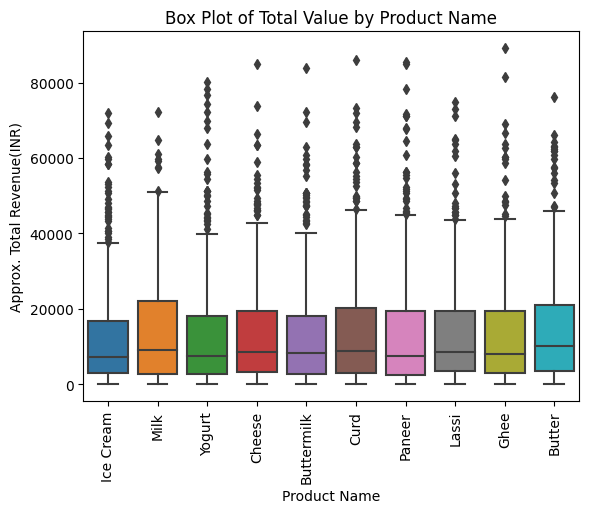

In [ ]:
import seaborn as sns
sns.boxplot(data=df, x='Product Name', y='Approx. Total Revenue(INR)')
plt.title('Box Plot of Total Value by Product Name')
plt.xticks(rotation=90)
plt.show()

In [ ]:
categorical_cols = ['Location', 'Farm Size', 'Product Name', 'Brand', 'Customer Location', 'Sales Channel']
numerical_cols = ['Total Land Area (acres)', 'Number of Cows', 'Quantity (liters/kg)', 'Price per Unit',
                  'Total Value', 'Shelf Life (days)',
                  'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
                  'Reorder Quantity (liters/kg)']

In [ ]:
from scipy.stats import zscore
# Import necessary libraries for model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
!pip install shap

# Filter the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.8 MB/s eta 0:00:00


In [ ]:
categorical_features = ['Location', 'Product Name', 'Brand', 'Storage Condition', 'Customer Location', 'Sales Channel']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

In [ ]:
cat_preprocessor = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
num_preprocessor = Pipeline([
    ('scaler', StandardScaler())
])

In [ ]:
preprocessor = ColumnTransformer([
    ('cat', cat_preprocessor, categorical_cols),
    ('num', num_preprocessor, numerical_cols)
])

In [ ]:
df.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

In [ ]:
from scipy.stats import zscore
z_scores = zscore(df['Approx. Total Revenue(INR)'])
df_no_outliers = df[(z_scores < 3)]

In [ ]:
df.shape

(4325, 23)

In [ ]:
df_no_outliers.shape

(4237, 23)

In [ ]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4237 non-null   object 
 1   Total Land Area (acres)              4237 non-null   float64
 2   Number of Cows                       4237 non-null   int64  
 3   Farm Size                            4237 non-null   object 
 4   Date                                 4237 non-null   object 
 5   Product ID                           4237 non-null   int64  
 6   Product Name                         4237 non-null   object 
 7   Brand                                4237 non-null   object 
 8   Quantity (liters/kg)                 4237 non-null   float64
 9   Price per Unit                       4237 non-null   float64
 10  Total Value                          4237 non-null   float64
 11  Shelf Life (days)             

In [ ]:
df.dtypes

Location                                object
Total Land Area (acres)                float64
Number of Cows                           int64
Farm Size                               object
Date                                    object
Product ID                               int64
Product Name                            object
Brand                                   object
Quantity (liters/kg)                   float64
Price per Unit                         float64
Total Value                            float64
Shelf Life (days)                        int64
Storage Condition                       object
Production Date                         object
Expiration Date                         object
Quantity Sold (liters/kg)                int64
Price per Unit (sold)                  float64
Approx. Total Revenue(INR)             float64
Customer Location                       object
Sales Channel                           object
Quantity in Stock (liters/kg)            int64
Minimum Stock

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Production Date'] = pd.to_datetime(df['Production Date'])
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'])

In [ ]:
df.dtypes

Location                                       object
Total Land Area (acres)                       float64
Number of Cows                                  int64
Farm Size                                      object
Date                                   datetime64[ns]
Product ID                                      int64
Product Name                                   object
Brand                                          object
Quantity (liters/kg)                          float64
Price per Unit                                float64
Total Value                                   float64
Shelf Life (days)                               int64
Storage Condition                              object
Production Date                        datetime64[ns]
Expiration Date                        datetime64[ns]
Quantity Sold (liters/kg)                       int64
Price per Unit (sold)                         float64
Approx. Total Revenue(INR)                    float64
Customer Location           

In [ ]:
df.drop(['Product ID','Date','Production Date','Expiration Date'],axis=1,inplace=True)


In [ ]:
df['Product Name'].nunique()

10

In [ ]:
df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,25,Frozen,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,Milk,Amul,687.48,42.61,29293.5228,22,Tetra Pack,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,Yogurt,Dodla Dairy,503.48,36.50,18377.0200,30,Refrigerated,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,Cheese,Britannia Industries,823.36,26.52,21835.5072,72,Frozen,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,Buttermilk,Mother Dairy,147.77,83.85,12390.5145,11,Refrigerated,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,Curd,Mother Dairy,554.90,88.45,49080.9050,5,Refrigerated,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,Yogurt,Palle2patnam,818.33,55.35,45294.5655,23,Refrigerated,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,Curd,Mother Dairy,583.56,92.61,54043.4916,7,Refrigerated,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,Curd,Raj,3.10,15.30,47.4300,7,Refrigerated,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


In [ ]:
# Define features and target variable
features = df.drop(columns=['Approx. Total Revenue(INR)'])  # Features (excluding the target variable)
target = df['Approx. Total Revenue(INR)']  # Target variable

# Split the data into training (70%), testing (15%), and validation (15%) sets
# Random_state is set for reproducibility, you can change it or omit it
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (3027, 18)
Testing set shape: (649, 18)
Validation set shape: (649, 18)


In [ ]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
X_val_preprocessed = preprocessor.transform(X_val)

In [ ]:
scaler = StandardScaler()
y_train_normalized = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = scaler.transform(y_test.values.reshape(-1, 1))
y_val_normalized = scaler.transform(y_val.values.reshape(-1,1))

In [ ]:
X_train_preprocessed

<3027x66 sparse matrix of type '<class 'numpy.float64'>'
	with 45405 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report


In [ ]:
# Train an Isolation Forest model for anomaly detection
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X_train_preprocessed)


IsolationForest(contamination=0.05, random_state=42)

In [ ]:
true_labels = df.iloc[X_test.index]['Number of Cows']  # Replace 'Anomaly_Labels' with your ground truth labels

# Evaluate the model's performance

In [ ]:
# Predict anomalies on the test set
y_pred = model.predict(X_test_preprocessed)

In [ ]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       6.0
          11       0.00      0.00      0.00       4.0
          12       0.00      0.00      0.00       7.0
          13       0.00      0.00      0.00       9.0
          14       0.00      0.00      0.00       4.0
          15       0.00      0.00      0.00       7.0
          16       0.00      0.00      0.00       7.0
          17       0.00      0.00      0.00       3.0
          18       0.00      0.00      0.00       4.0
          19       0.00      0.00      0.00      10.0
          20       0.00      0.00      0.00       7.0
          21       0.00      0.00      0.00       6.0
          22       0.00      0.00      0.00       7.0
          23       0.00      0.00      0.00       5.0
          24       0.00      0.00      0.00       9.0
   

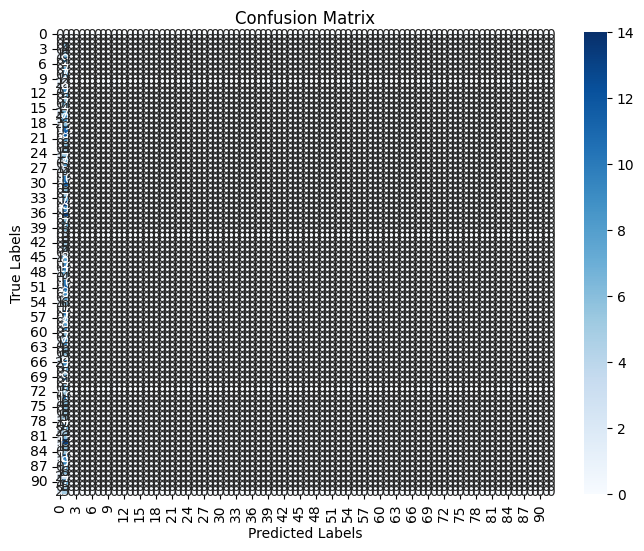

In [ ]:

# Evaluate the model's performance
classification_report_result = classification_report(true_labels, y_pred)
confusion_matrix_result = confusion_matrix(true_labels, y_pred)

print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

# Plot a heatmap of the confusion matrix for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

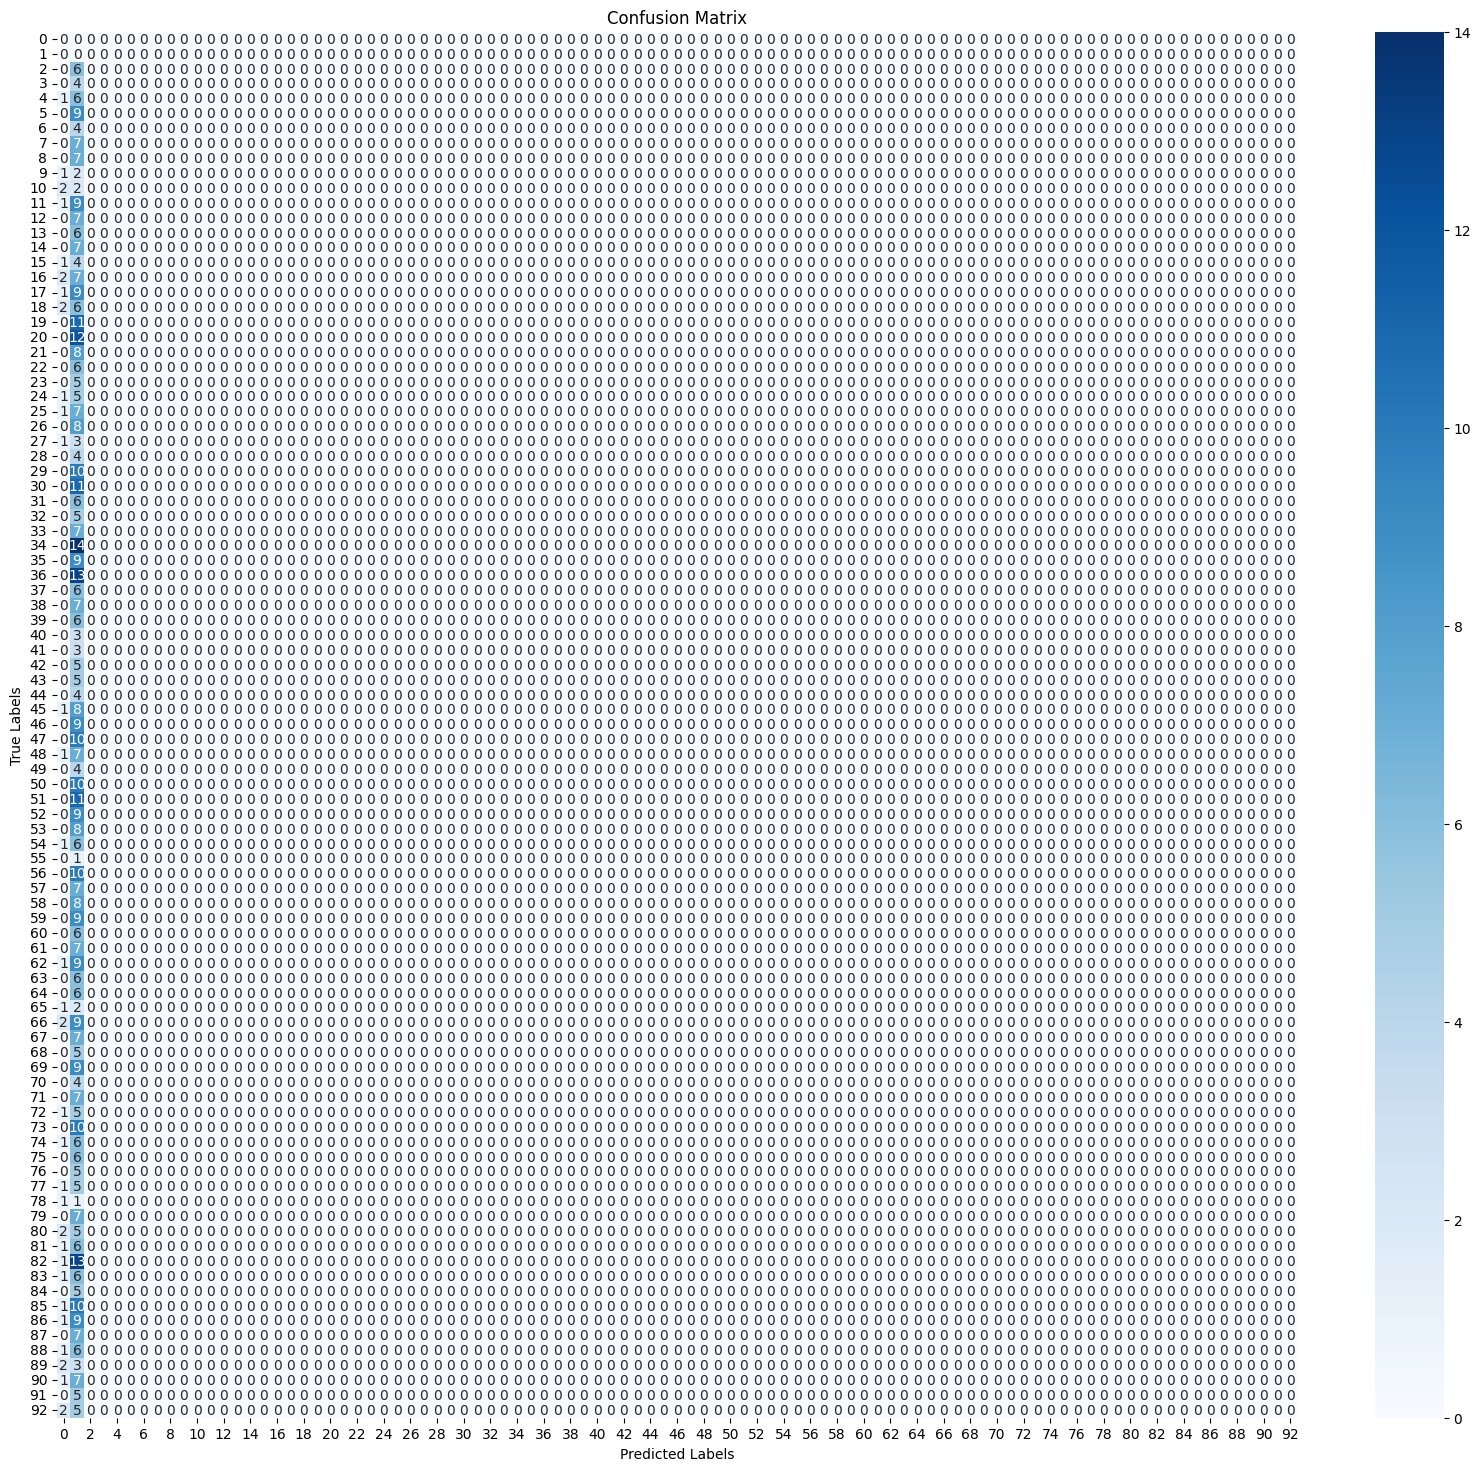

In [ ]:
# Plot a heatmap of the confusion matrix for visualization
plt.figure(figsize=(20, 18))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import random

# Define a class to represent an IoT device
class IoTDevice:
    def __init__(self, device_id):
        self.device_id = device_id
        self.trust_score = 0.5  # Initial trust score (between 0 and 1)

    def update_trust_score(self, behavior_score):
        # Update the trust score based on the device's behavior
        self.trust_score = (self.trust_score + behavior_score) / 2

    def is_suspicious(self, threshold=0.4):
        # Check if the device is suspicious based on the trust score
        return self.trust_score < threshold

# Simulate a list of IoT devices
num_devices = 10
devices = [IoTDevice(device_id) for device_id in range(num_devices)]

# Simulate behavior and update trust scores
for _ in range(100):
    # Randomly select a device and simulate its behavior score
    device = random.choice(devices)
    behavior_score = random.uniform(0.0, 1.0)

    # Update the device's trust score based on behavior
    device.update_trust_score(behavior_score)

# Detect and isolate suspicious devices
suspicious_devices = [device for device in devices if device.is_suspicious()]
trusted_devices = [device for device in devices if not device.is_suspicious()]

print("Suspicious Devices:")
for device in suspicious_devices:
    print(f"Device ID: {device.device_id}, Trust Score: {device.trust_score}")

print("\nTrusted Devices:")
for device in trusted_devices:
    print(f"Device ID: {device.device_id}, Trust Score: {device.trust_score}")


Suspicious Devices:
Device ID: 7, Trust Score: 0.3502848173703317

Trusted Devices:
Device ID: 0, Trust Score: 0.7422765542939325
Device ID: 1, Trust Score: 0.4354508579297514
Device ID: 2, Trust Score: 0.4425105682135823
Device ID: 3, Trust Score: 0.5220683865786749
Device ID: 4, Trust Score: 0.5463849784788182
Device ID: 5, Trust Score: 0.7257503287011013
Device ID: 6, Trust Score: 0.7133855206164444
Device ID: 8, Trust Score: 0.5941725711688213
Device ID: 9, Trust Score: 0.45106776058697085


In [ ]:
df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,25,Frozen,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,Milk,Amul,687.48,42.61,29293.5228,22,Tetra Pack,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,Yogurt,Dodla Dairy,503.48,36.50,18377.0200,30,Refrigerated,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,Cheese,Britannia Industries,823.36,26.52,21835.5072,72,Frozen,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,Buttermilk,Mother Dairy,147.77,83.85,12390.5145,11,Refrigerated,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,Curd,Mother Dairy,554.90,88.45,49080.9050,5,Refrigerated,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,Yogurt,Palle2patnam,818.33,55.35,45294.5655,23,Refrigerated,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,Curd,Mother Dairy,583.56,92.61,54043.4916,7,Refrigerated,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,Curd,Raj,3.10,15.30,47.4300,7,Refrigerated,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


In [ ]:
df.dtypes

Location                                object
Total Land Area (acres)                float64
Number of Cows                           int64
Farm Size                               object
Product Name                            object
Brand                                   object
Quantity (liters/kg)                   float64
Price per Unit                         float64
Total Value                            float64
Shelf Life (days)                        int64
Storage Condition                       object
Quantity Sold (liters/kg)                int64
Price per Unit (sold)                  float64
Approx. Total Revenue(INR)             float64
Customer Location                       object
Sales Channel                           object
Quantity in Stock (liters/kg)            int64
Minimum Stock Threshold (liters/kg)    float64
Reorder Quantity (liters/kg)           float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location']=le.fit_transform(df['Location'])
df['Farm Size']=le.fit_transform(df['Farm Size'])
df['Product Name']=le.fit_transform(df['Product Name'])
df['Brand']=le.fit_transform(df['Brand'])
df['Storage Condition']=le.fit_transform(df['Storage Condition'])
df['Customer Location']=le.fit_transform(df['Customer Location'])
df['Sales Channel']=le.fit_transform(df['Sales Channel'])

In [ ]:
df.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Product Name', 'Brand', 'Quantity (liters/kg)', 'Price per Unit',
       'Total Value', 'Shelf Life (days)', 'Storage Condition',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   int64  
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   int64  
 4   Product Name                         4325 non-null   int64  
 5   Brand                                4325 non-null   int64  
 6   Quantity (liters/kg)                 4325 non-null   float64
 7   Price per Unit                       4325 non-null   float64
 8   Total Value                          4325 non-null   float64
 9   Shelf Life (days)                    4325 non-null   int64  
 10  Storage Condition                    4325 non-null   int64  
 11  Quantity Sold (liters/kg)     

In [ ]:
df['Approx. Total Revenue(INR)'].mean()

13580.265401156072

In [ ]:
# Mean revenue value
mean_revenue = 13580.27  # Replace this with your actual mean value

# Define a threshold or target value (you can adjust this based on your criteria)
threshold_value = 15000  # Adjust as needed

# Compare the mean revenue to the threshold
if mean_revenue >= threshold_value:
    print("The mean revenue is good.")
else:
    print("The mean revenue is bad.")


The mean revenue is bad.


In [ ]:
df.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Product Name', 'Brand', 'Quantity (liters/kg)', 'Price per Unit',
       'Total Value', 'Shelf Life (days)', 'Storage Condition',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

In [ ]:
df.drop(['Location','Number of Cows','Farm Size','Product Name','Brand','Customer Location','Sales Channel','Storage Condition'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Total Land Area (acres)', 'Quantity (liters/kg)', 'Price per Unit',
       'Total Value', 'Shelf Life (days)', 'Quantity Sold (liters/kg)',
       'Price per Unit (sold)', 'Approx. Total Revenue(INR)',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

In [ ]:
X = df.drop('Approx. Total Revenue(INR)',axis=1)
y=df['Approx. Total Revenue(INR)']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Flatten, Concatenate

In [ ]:
# Create a sequential model with both GRU and FCN layers
model = Sequential()

# Add a GRU layer for sequential input
model.add(GRU(units=64, activation='tanh', input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(GRU(units=64, activation='tanh', return_sequences=True))

# Flatten the output of the last GRU layer
model.add(Flatten())

# Add FCN layers for feature processing
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add the output layer for regression (adjust activation as needed)
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Adjust optimizer and loss function as needed

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)  # Adjust epochs and batch size

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Make predictions using the trained model
predictions = model.predict(X_test)

Epoch 1/100
87/87 [==============================] - 14s 28ms/step - loss: 380592256.0000 - val_loss: 390146208.0000
Epoch 2/100
87/87 [==============================] - 2s 18ms/step - loss: 290175328.0000 - val_loss: 261562480.0000
Epoch 3/100
87/87 [==============================] - 2s 18ms/step - loss: 214007808.0000 - val_loss: 239980432.0000
Epoch 4/100
87/87 [==============================] - 2s 18ms/step - loss: 210687664.0000 - val_loss: 240001856.0000
Epoch 5/100
87/87 [==============================] - 2s 25ms/step - loss: 210712512.0000 - val_loss: 239888272.0000
Epoch 6/100
87/87 [==============================] - 3s 30ms/step - loss: 210375152.0000 - val_loss: 232127216.0000
Epoch 7/100
87/87 [==============================] - 2s 21ms/step - loss: 149910576.0000 - val_loss: 118542264.0000
Epoch 8/100
87/87 [==============================] - 2s 18ms/step - loss: 80045824.0000 - val_loss: 78046928.0000
Epoch 9/100
87/87 [==============================] - 2s 18ms/step - loss:

In [ ]:
# Define a callback for logging training and validation loss
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

loss_history = LossHistory()


In [ ]:
# Train the model and log the loss history
history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=32,
    validation_split=0.2,
    callbacks=[loss_history]  # Pass the callback to track loss history
)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Make predictions using the trained model
predictions = model.predict(X_test)



Epoch 1/100
87/87 [==============================] - 2s 22ms/step - loss: 372562.1875 - val_loss: 601378.0000
Epoch 2/100
87/87 [==============================] - 2s 21ms/step - loss: 316004.2500 - val_loss: 1099117.6250
Epoch 3/100
87/87 [==============================] - 2s 20ms/step - loss: 404438.7500 - val_loss: 525232.3125
Epoch 4/100
87/87 [==============================] - 2s 20ms/step - loss: 437224.4062 - val_loss: 581303.3750
Epoch 5/100
87/87 [==============================] - 2s 20ms/step - loss: 145053.3125 - val_loss: 356314.8438
Epoch 6/100
87/87 [==============================] - 3s 29ms/step - loss: 92389.2891 - val_loss: 291881.0312
Epoch 7/100
87/87 [==============================] - 3s 36ms/step - loss: 67625.1016 - val_loss: 409102.9688
Epoch 8/100
87/87 [==============================] - 2s 20ms/step - loss: 411149.4688 - val_loss: 874941.1250
Epoch 9/100
87/87 [==============================] - 2s 20ms/step - loss: 2042031.1250 - val_loss: 10806325.0000
Epoch 10

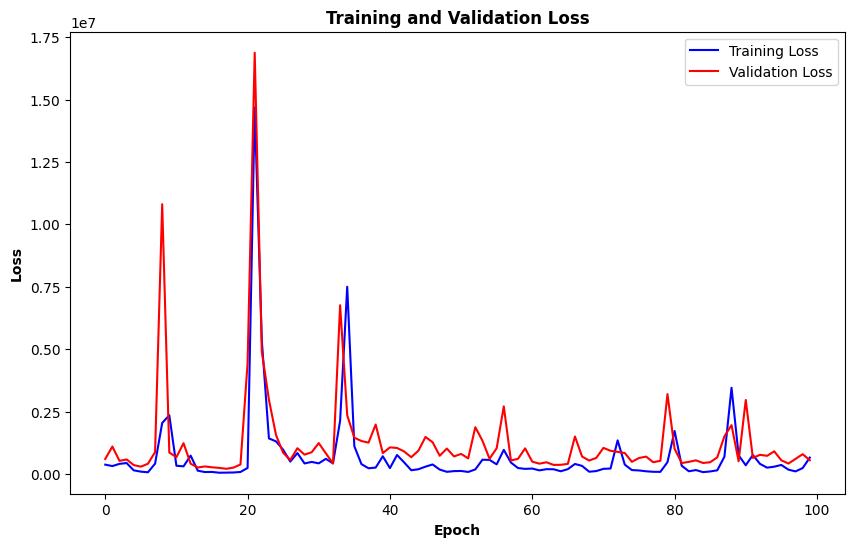

In [ ]:
# Visualize training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss',fontweight='bold')
plt.xlabel('Epoch',fontweight='bold')
plt.ylabel('Loss',fontweight='bold')
plt.legend()
plt.show()


In [ ]:
import hashlib
import hmac
import pandas as pd



# Data to be hashed and authenticated
data_to_hash = df.to_csv(index=False)  # Convert DataFrame to CSV string

# Calculate SHA-256 hash
sha256 = hashlib.sha256()
sha256.update(data_to_hash.encode('utf-8'))
hashed_data = sha256.hexdigest()

# Secret key for HMAC
secret_key = b'SecretKey123'  # Replace with your secret key

# Calculate HMAC-SHA-256
hmac_sha256 = hmac.new(secret_key, hashed_data.encode('utf-8'), hashlib.sha256)
hmac_hex = hmac_sha256.hexdigest()

# Print the SHA-256 hash and HMAC
print("SHA-256 Hash:", hashed_data)
print("HMAC-SHA-256:", hmac_hex)


SHA-256 Hash: 61706f0a0d6b81948d76ee352f8849fdbf762e3ef7fb97526503a5f043ade97d
HMAC-SHA-256: 87398cedb92ae16ef825fa21c1dea38050e6600e72f4db547d91b6a3111c879a


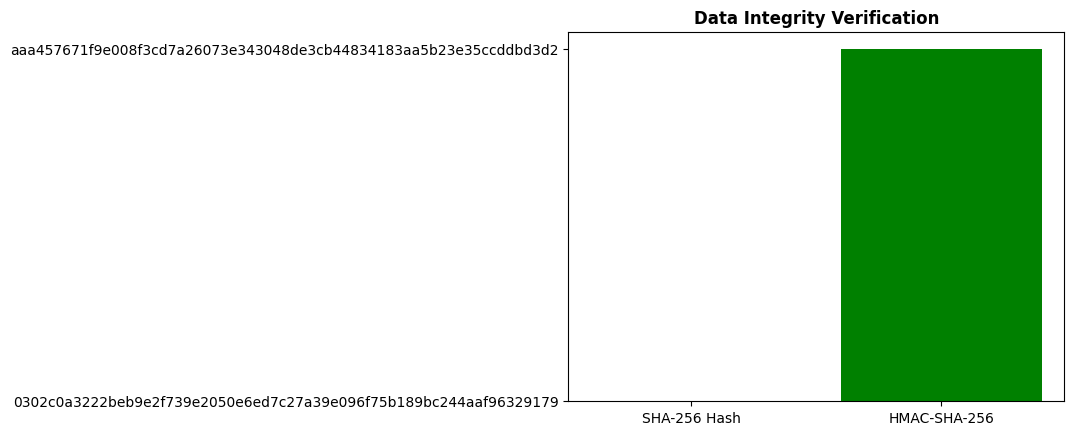

In [ ]:
import hashlib
import hmac
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/SAC10491/dairy_dataset.csv')

# Data to be hashed and authenticated
data_to_hash = df.to_csv(index=False)  # Convert DataFrame to CSV string

# Calculate SHA-256 hash
sha256 = hashlib.sha256()
sha256.update(data_to_hash.encode('utf-8'))
hashed_data = sha256.hexdigest()

# Secret key for HMAC
secret_key = b'SecretKey123'  # Replace with your secret key

# Calculate HMAC-SHA-256
hmac_sha256 = hmac.new(secret_key, hashed_data.encode('utf-8'), hashlib.sha256)
hmac_hex = hmac_sha256.hexdigest()

# Create a bar chart to visualize the comparison
labels = ['SHA-256 Hash', 'HMAC-SHA-256']
values = [hashed_data, hmac_hex]
colors = ['blue', 'green']

plt.bar(labels, values, color=colors)
plt.title('Data Integrity Verification',fontweight='bold')
plt.show()


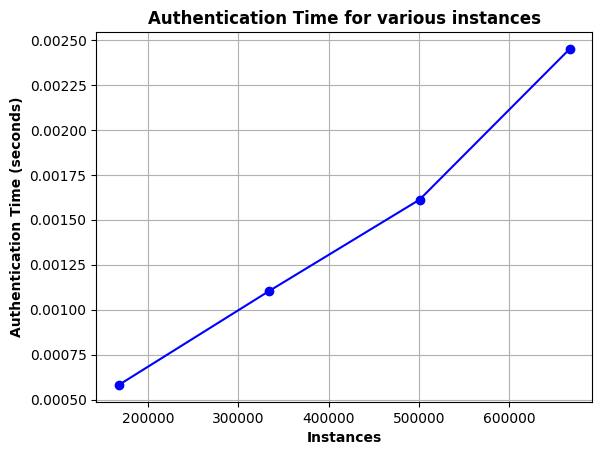

In [ ]:
import hashlib
import hmac
import pandas as pd
import matplotlib.pyplot as plt
import time

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/SAC10491/dairy_dataset.csv')

# Secret key for HMAC
secret_key = b'SecretKey123'  # Replace with your secret key

# Initialize lists to store authentication times and data sizes
authentication_times = []
data_sizes = []

# Vary the data size for multiple instances (for example, every 1000 rows)
for i in range(1000, len(df) + 1, 1000):
    # Extract a subset of the data
    subset_df = df.iloc[:i]

    # Data to be hashed and authenticated
    data_to_hash = subset_df.to_csv(index=False)  # Convert DataFrame to CSV string
    data_size = len(data_to_hash)
    data_sizes.append(data_size)

    # Calculate the time taken to calculate HMAC-SHA-256
    start_time = time.time()
    hmac_sha256 = hmac.new(secret_key, data_to_hash.encode('utf-8'), hashlib.sha256)
    hmac_hex = hmac_sha256.hexdigest()
    end_time = time.time()

    authentication_time = end_time - start_time
    authentication_times.append(authentication_time)

# Create a scatter plot to visualize authentication times vs. data sizes
plt.plot(data_sizes, authentication_times, color='blue',marker='o')
plt.title('Authentication Time for various instances',fontweight='bold')
plt.xlabel('Instances',fontweight='bold')
plt.ylabel('Authentication Time (seconds)',fontweight='bold')
plt.grid(True)
plt.show()


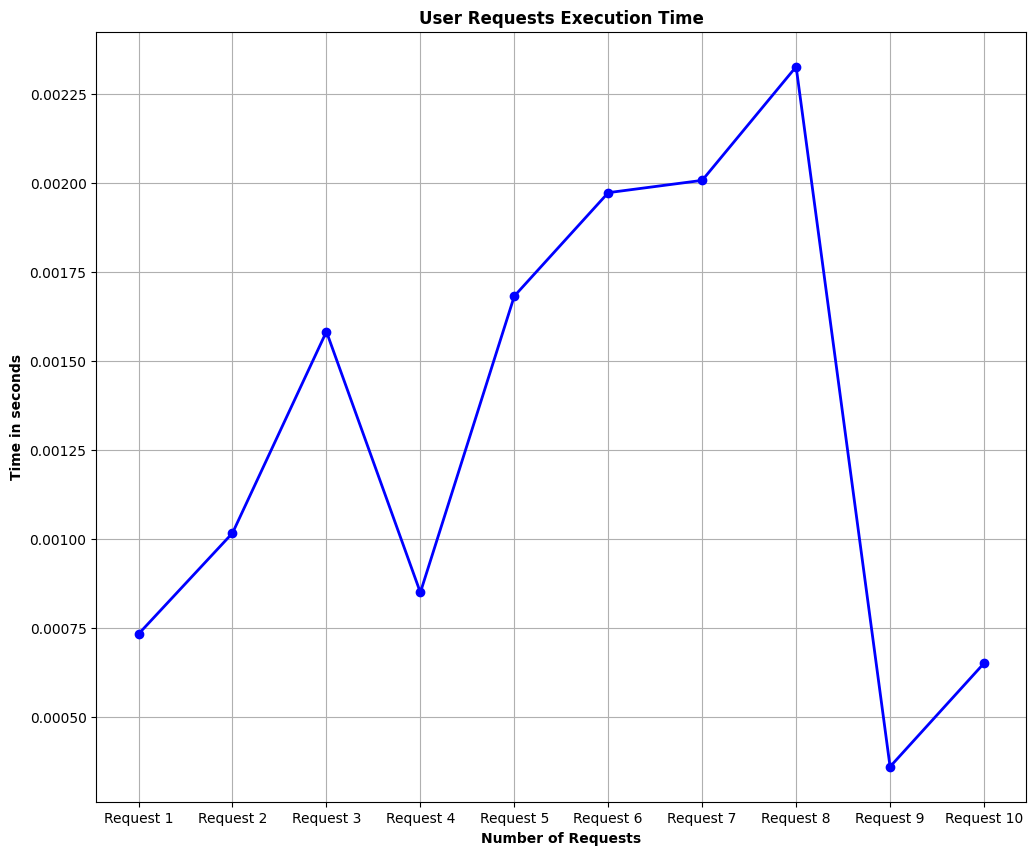

In [ ]:
import hashlib
import hmac
import pandas as pd
import time
import random
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/SAC10491/dairy_dataset.csv')

# Secret key for HMAC
secret_key = b'SecretKey123'  # Replace with your secret key

# Number of user requests
num_requests = 10  # You can change this to the desired number of requests

# Initialize lists to store user request execution times
execution_times = []

# Simulate user requests
for _ in range(num_requests):
    # Randomly select a subset of the data
    subset_df = df.sample(frac=random.uniform(0.1, 1.0))

    # Data to be hashed and authenticated
    data_to_hash = subset_df.to_csv(index=False)  # Convert DataFrame to CSV string

    # Calculate the time taken to calculate HMAC-SHA-256
    start_time = time.time()
    hmac_sha256 = hmac.new(secret_key, data_to_hash.encode('utf-8'), hashlib.sha256)
    hmac_hex = hmac_sha256.hexdigest()
    end_time = time.time()

    execution_time = end_time - start_time
    execution_times.append(execution_time)

# Create a line plot to visualize user request execution times
plt.figure(figsize=(12,10))
plt.plot(range(num_requests), execution_times, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('User Requests Execution Time',fontweight='bold')
plt.xlabel('Number of Requests',fontweight='bold')
plt.ylabel('Time in seconds',fontweight='bold')
plt.xticks(range(num_requests), [f'Request {i+1}' for i in range(num_requests)], rotation=None)
plt.grid(True)
plt.show()


In [ ]:
import hashlib
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/SAC10491/dairy_dataset.csv')

# Convert the DataFrame to a CSV string
data_to_hash = df.to_csv(index=False)  # Convert DataFrame to CSV string

# Calculate SHA-256 hash
sha256 = hashlib.sha256()
sha256.update(data_to_hash.encode('utf-8'))
hashed_data = sha256.hexdigest()

# Print the constant SHA-256 hash value
print("SHA-256 Hash Value:", hashed_data)


SHA-256 Hash Value: 0302c0a3222beb9e2f739e2050e6ed7c27a39e096f75b189bc244aaf96329179


In [ ]:
import hashlib
import pandas as pd
from prettytable import PrettyTable

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/SAC10491/dairy_dataset.csv')

# Convert the DataFrame to a CSV string
data_to_hash = df.to_csv(index=False)  # Convert DataFrame to CSV string

# Calculate SHA-256 hash
sha256 = hashlib.sha256()
sha256.update(data_to_hash.encode('utf-8'))
hashed_data = sha256.hexdigest()

# Create a table to display the hash value
table = PrettyTable()
table.field_names = ["Dataset", "SHA-256 Hash"]
table.add_row(["Dairy Dataset", hashed_data])

print(table)


+---------------+------------------------------------------------------------------+
|    Dataset    |                           SHA-256 Hash                           |
+---------------+------------------------------------------------------------------+
| Dairy Dataset | 0302c0a3222beb9e2f739e2050e6ed7c27a39e096f75b189bc244aaf96329179 |
+---------------+------------------------------------------------------------------+


In [ ]:
df.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

In [ ]:
# Define a function to calculate SHA-256 hash
def calculate_sha256_hash(data):
    sha256 = hashlib.sha256()
    sha256.update(str(data).encode('utf-8'))
    return sha256.hexdigest()

# Create 'ulabel' column based on a combination of selected columns
columns_to_hash = ['Location', 'Total Land Area (acres)', 'Number of Cows']  # Add columns to include in 'ulabel'
df['ulabel'] = df[columns_to_hash].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
df['ulabel'] = df['ulabel'].apply(lambda x: calculate_sha256_hash(x))

# Create 'hash1' and 'hash2' columns based on other columns
df['hash1'] = df['Location'].apply(lambda x: calculate_sha256_hash(x + 'salt1'))
df['hash2'] = df['Total Land Area (acres)'].apply(lambda x: calculate_sha256_hash(str(x) + 'salt2'))

# Display the DataFrame with the new columns
print(df)

           Location  Total Land Area (acres)  Number of Cows Farm Size  \
0         Telangana                   310.84              96    Medium   
1     Uttar Pradesh                    19.19              44     Large   
2        Tamil Nadu                   581.69              24    Medium   
3         Telangana                   908.00              89     Small   
4       Maharashtra                   861.95              21    Medium   
...             ...                      ...             ...       ...   
4320          Delhi                   748.71              89    Medium   
4321      Jharkhand                   385.91              29     Large   
4322     Chandigarh                   311.54              65     Small   
4323    Maharashtra                   890.55              90     Small   
4324      Rajasthan                   492.86              58     Large   

            Date  Product ID Product Name                 Brand  \
0     2022-02-17           5    Ice Cream   

In [ ]:
# Count the occurrences of hash1 and hash2
hash1_counts = df['hash1'].value_counts()
hash2_counts = df['hash2'].value_counts()

# Calculate the total number of rows in the DataFrame
total_rows = len(df)

# Calculate the number of appearances for hash1 and hash2
number_of_appearances_hash1 = hash1_counts.sum()
number_of_appearances_hash2 = hash2_counts.sum()

# Calculate the number of unique hash1 and hash2 values
number_of_unique_hash1 = len(hash1_counts)
number_of_unique_hash2 = len(hash2_counts)

# Calculate the probability of each hash1 and hash2 value
probability_hash1 = hash1_counts / total_rows
probability_hash2 = hash2_counts / total_rows

# Display the results
print(f"Number of Appearances for hash1: {number_of_appearances_hash1}")
print(f"Number of Appearances for hash2: {number_of_appearances_hash2}")
print(f"Number of Unique hash1 values: {number_of_unique_hash1}")
print(f"Number of Unique hash2 values: {number_of_unique_hash2}")
print("Probability Distribution for hash1:")
print(probability_hash1)
print("Probability Distribution for hash2:")
print(probability_hash2)


Number of Appearances for hash1: 4325
Number of Appearances for hash2: 4325
Number of Unique hash1 values: 15
Number of Unique hash2 values: 4235
Probability Distribution for hash1:
fc311e9e2549221299c529339ffce0c90ad6ba964b21d8e44f71e4024015b313    0.121387
1d8a36d70f1b2d9ebf60b70da77bd151a9903f7ed1875af211f38640699e9880    0.120000
bb5aa3efe370fcac315fe6e460dcbcd6fe0eac5c90ad42d18101737dd201f2e5    0.063815
1b44ab618868e9366c09bf352edcd58282337025e30d1aebaa1570d4abc9cc99    0.061734
527507a5af3144034f594e62b0baec9e70a5a88271e2834ca526c19929390225    0.060347
f3705ae50595b45ceb0bb4465152de5ee057870bd5a0ff83109396fb519d130c    0.059884
8e9d7bab4dca8a83eb21eec5f3df217b0753861023bb26d240c9f414e0ae9df4    0.059191
0f4e72bd7fee7bc2c729d4eeced8b108b5a71e7e6441e72bab999d5226abc12e    0.058960
86d4ea6e6a3c1c419a946f6892c67c091deb680ef3f6b90c11f215826475b67a    0.058497
5512dd11ec1cf12ccaa0f4e2ca0c7b450bcb9ca88bf26829296be3b48dee3345    0.057572
0e1f3bc0ecc75efda57edd9af47aae222244edac6e670011

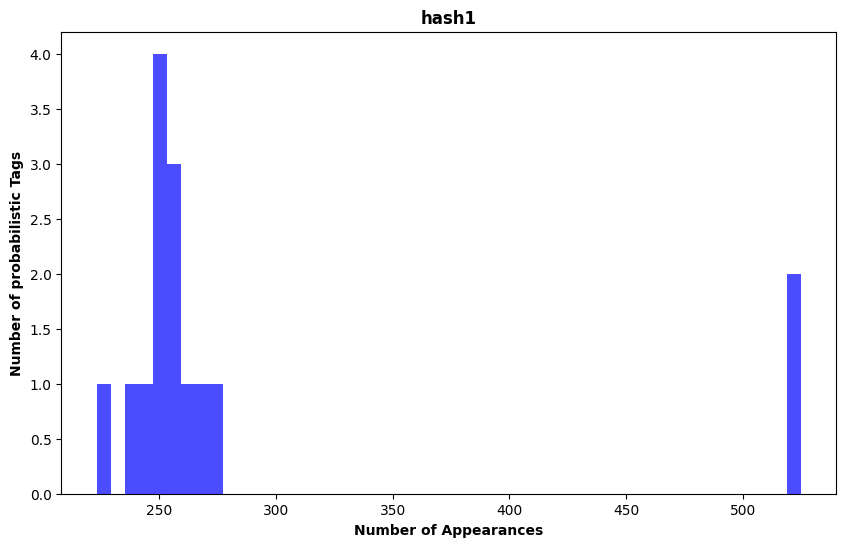

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of hash1
hash1_counts = df['hash1'].value_counts()

# Calculate the number of appearances for hash1
number_of_appearances_hash1 = hash1_counts.values

# Create a histogram plot
plt.figure(figsize=(10, 6))
plt.hist(number_of_appearances_hash1, bins=50, color='blue', alpha=0.7)
plt.title('hash1', fontweight='bold')
plt.xlabel('Number of Appearances', fontweight='bold')
plt.ylabel('Number of probabilistic Tags', fontweight='bold')
plt.show()


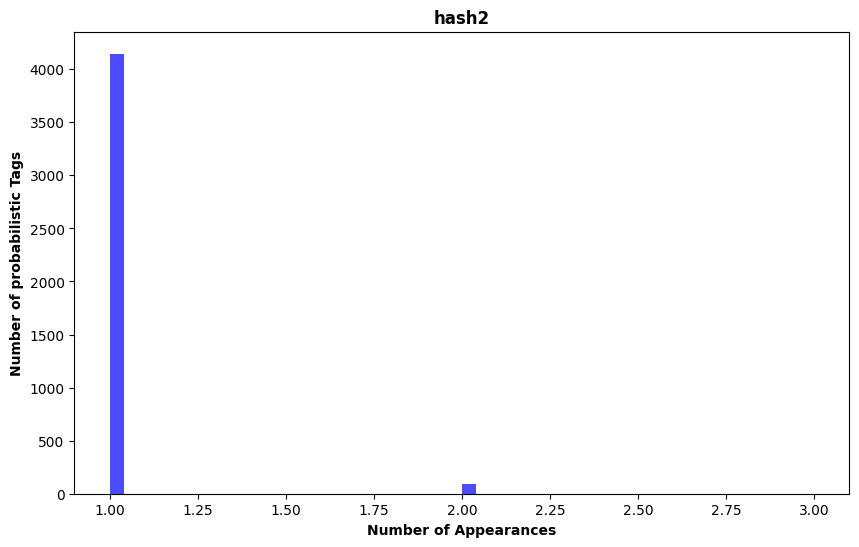

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of hash1
hash2_counts = df['hash2'].value_counts()

# Calculate the number of appearances for hash1
number_of_appearances_hash2 = hash2_counts.values

# Create a histogram plot
plt.figure(figsize=(10, 6))
plt.hist(number_of_appearances_hash2, bins=50, color='blue', alpha=0.7)
plt.title('hash2', fontweight='bold')
plt.xlabel('Number of Appearances', fontweight='bold')
plt.ylabel('Number of probabilistic Tags', fontweight='bold')
plt.show()


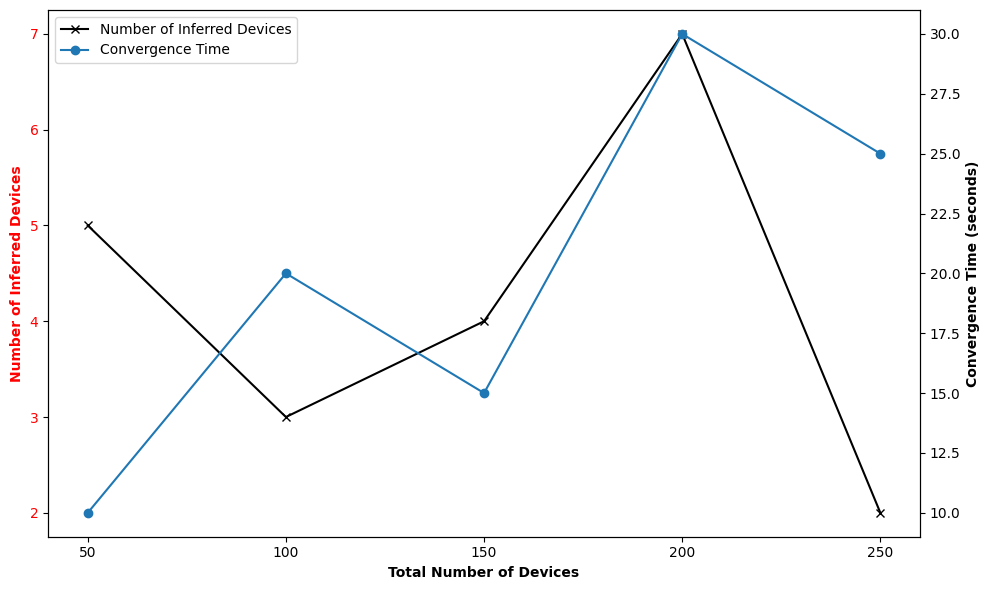

50

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import hashlib

# Sample data (replace this with your actual DataFrame)
data = {
    'Location': ['Telangana', 'Uttar Pradesh', 'Tamil Nadu', 'Telangana', 'Maharashtra'],
    'Total Land Area (acres)': [310.84, 19.19, 581.69, 908.00, 861.95],
    'Number of Cows': [96, 44, 24, 89, 21],
    'Convergence Time (s)': [10, 20, 15, 30, 25],
    'Number of Inferred Devices': [5, 3, 4, 7, 2]
}

df = pd.DataFrame(data)

# Calculate SHA-256 hash for 'ulabel'
def calculate_sha256_hash(data):
    sha256 = hashlib.sha256()
    sha256.update(str(data).encode('utf-8'))
    return sha256.hexdigest()

df['ulabel'] = df.apply(lambda row: calculate_sha256_hash(row), axis=1)

# Get the values for the x-axis ticks
x_values = df['ulabel'].tolist()

# Create a plot with y-axis as 'Number of Inferred Devices' and x-axis as 'Total Number of Devices'
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(range(len(x_values)), df['Number of Inferred Devices'], marker='x', linestyle='-', color='black', label='Number of Inferred Devices')
ax1.set_xlabel('Total Number of Devices', fontweight='bold')
ax1.set_ylabel('Number of Inferred Devices', fontweight='bold', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Set x-axis ticks and labels
ax1.set_xticks(range(len(x_values)))
ax1.set_xticklabels([50,100,150,200,250])  # Rotate x-axis labels for better readability

# Create a second y-axis on the right for 'Convergence Time'
ax2 = ax1.twinx()
ax2.plot(range(len(x_values)), df['Convergence Time (s)'], marker='o', linestyle='-', label='Convergence Time')
ax2.set_ylabel('Convergence Time (seconds)', fontweight='bold')
ax2.tick_params(axis='y')

# Combine legends for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()
50

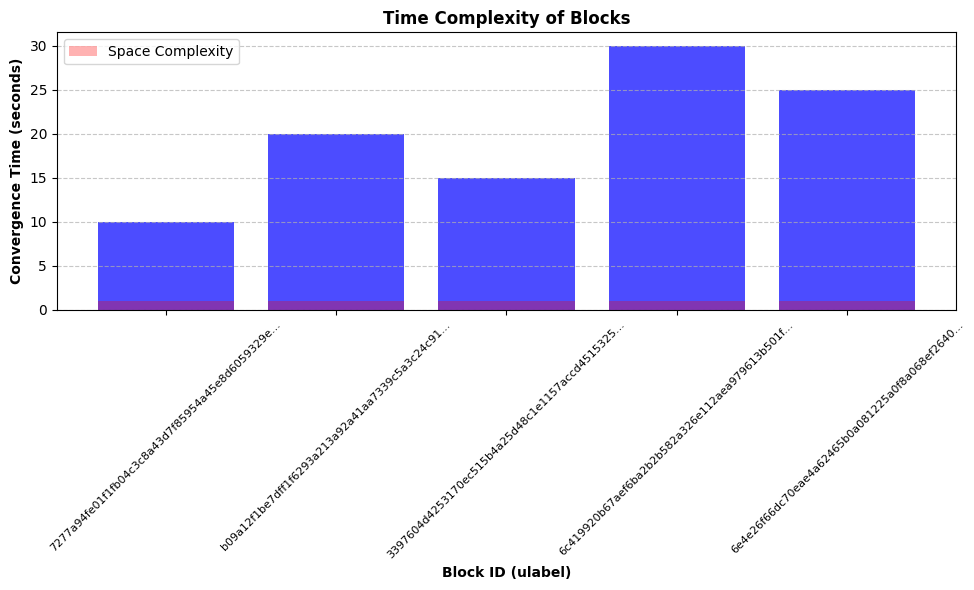

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Location': ['Telangana', 'Uttar Pradesh', 'Tamil Nadu', 'Telangana', 'Maharashtra'],
    'Total Land Area (acres)': [310.84, 19.19, 581.69, 908.00, 861.95],
    'Number of Cows': [96, 44, 24, 89, 21],
    'Convergence Time (s)': [10, 20, 15, 30, 25],
    'Number of Inferred Devices': [5, 3, 4, 7, 2],
    'ulabel': [
        '7277a94fe01f1fb04c3c8a43d7f85954a45e8d6059329e...',
        'b09a12f1be7dff1f6293a213a92a41aa7339c5a3c24c91...',
        '3397604d4253170ec515b4a25d48c1e1157accd4515325...',
        '6c419920b67aef6ba2b2b582a326e112aea979613b501f...',
        '6e4e26f66dc70eae4a62465b0a081225a0f8a068ef2640...'
    ]
}

df = pd.DataFrame(data)

# Create a bar plot for Convergence Time (s)
plt.figure(figsize=(10, 6))
plt.bar(df['ulabel'], df['Convergence Time (s)'], color='blue', alpha=0.7)
plt.xlabel('Block ID (ulabel)', fontweight='bold')
plt.ylabel('Convergence Time (seconds)', fontweight='bold')
plt.title('Time Complexity of Blocks', fontweight='bold')
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Assume a constant space complexity for simplicity
# You can replace this with actual space complexity values if available
space_complexity = [1] * len(df)
plt.bar(df['ulabel'], space_complexity, color='red', alpha=0.3, label='Space Complexity')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


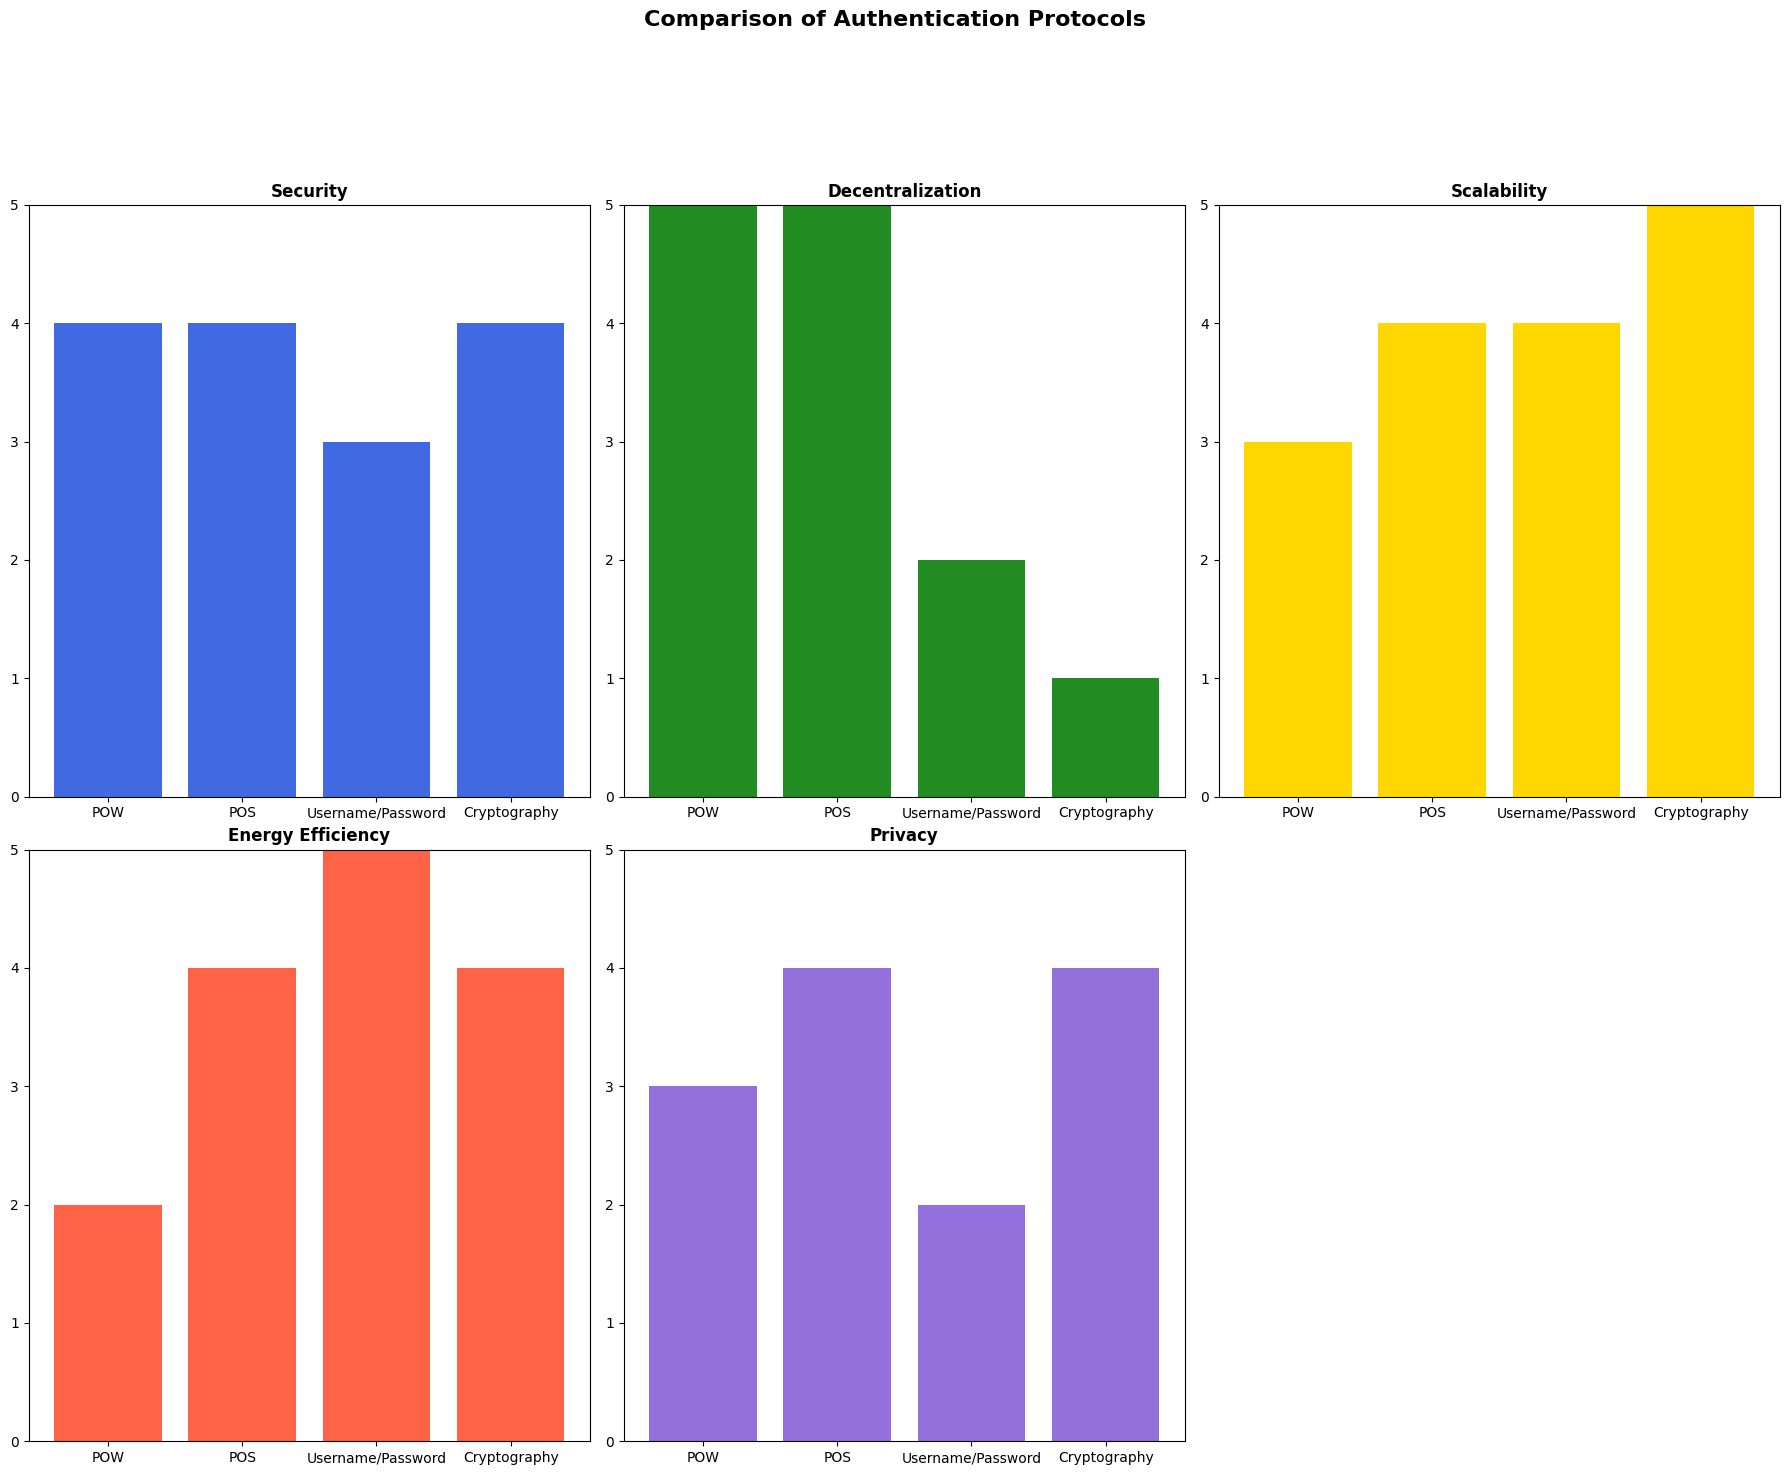

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with relevant data)
data = {
    'Protocol': ['POW', 'POS', 'Username/Password', 'Cryptography'],
    'Security': [4, 4, 3, 4],  # On a scale of 1 to 5 (5 being the highest)
    'Decentralization': [5, 5, 2, 1],
    'Scalability': [3, 4, 4, 5],
    'Energy Efficiency': [2, 4, 5, 4],
    'Consensus Mechanism': ['PoW', 'PoS', 'None', 'Public Key'],
    'Use Cases': ['Blockchain', 'Blockchain', 'Web/App Authentication', 'Secure Communication'],
    'Privacy': [3, 4, 2, 4]  # On a scale of 1 to 5 (5 being the highest)
}

df = pd.DataFrame(data)

# Define colors for each aspect (optional)
colors = {
    'Security': 'royalblue',
    'Decentralization': 'forestgreen',
    'Scalability': 'gold',
    'Energy Efficiency': 'tomato',
    'Privacy': 'mediumpurple'
}

# Create subplots for each aspect
aspects = ['Security', 'Decentralization', 'Scalability', 'Energy Efficiency', 'Privacy']
plt.figure(figsize=(18, 15))
for i, aspect in enumerate(aspects, start=1):
    plt.subplot(2, 3, i)
    plt.bar(df['Protocol'], df[aspect], color=colors.get(aspect, 'lightgray'))
    plt.ylim(0, 5)  # Set the y-axis limit to a scale of 1 to 5
    plt.title(aspect, fontsize=12, fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Add a common title
plt.suptitle('Comparison of Authentication Protocols', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.85)

# Show the plot
plt.show()
